In [1]:
%matplotlib inline
#Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group


#own modules
from tanh import g,dg,ddg,dddg, plot_tanh
import myplots
from tensor_util import *
from main_function import f, df, ddf, dddf

g_name = "tanh"

[myplots.py]: Saving plots to /home/pca/code/ma/plots


In [2]:
def uniformSphere(d, m_x):
    x = np.random.normal(size=(m_x,d))
    for i in range(m_x):
        x[i] = x[i] / np.linalg.norm(x[i])
    return x

def perm_matrix(m):
    P = np.identity(m)
    P = np.random.permutation(P)#permutes only the rows
    return P, np.linalg.inv(P)
def decomp_svd_dd(X,A,B, randomize=False):
    """tbd.

    Parameters
    ----------
    X : matrix
        m_x samples \in R^m
    A : matrix
        m orthonormal vectors \in R^m
    B : matrix
        m_1 orthonormal vectors \in R^m
    randomize: bool
        if true performs a random unfolding
    Returns
    -------
    alot

    """
    m = A.shape[1]
    ddf_values = ddf(X,A,B)
    unfolds = [np.reshape(dd, (m**2,)) for dd in ddf_values]
    
    if randomize:
        P,Q = perm_matrix(m**2)
        unfolds = [np.dot(P,v) for v in unfolds]
        
    M = np.transpose(np.array(unfolds))
    U,D,V = np.linalg.svd(M)
    if randomize: 
        U = np.dot(Q,U)
    return ddf_values, U, D
        
    
def decomp_svd_ddd(X,A,B, randomize=False):
    """tbd.

    Parameters
    ----------
    X : matrix
        m_x samples \in R^m
    A : matrix
        m orthonormal vectors \in R^m
    B : matrix
        m_1 orthonormal vectors \in R^m
    randomize: bool
        if true performs a random unfolding
    Returns
    -------
    alot

    """
    m = A.shape[1]
    dddf_values = dddf(X,A,B)
    unfolds = [np.reshape(dd, (m**3,)) for dd in dddf_values]
    
    if randomize:
        P,Q = perm_matrix(m**3)
        unfolds = [np.dot(P,v) for v in unfolds]
        
    M = np.transpose(np.array(unfolds))
    U,D,V = np.linalg.svd(M)
    if randomize: 
        U = np.dot(Q,U)
    return dddf_values, U, D

In [3]:
#Setting parameters, and creating data
m = 4
m_1 = 1
m_x = 1000
X = uniformSphere(m, m_x)
A = ortho_group.rvs(dim = m)# m orthogonal vectors with dim m, a_1, ..., a_m
A = np.transpose(A)
B = ortho_group.rvs(dim = m)[:m_1]#m_1 orthogonal vectors with dimension m b_1, ..., b_m_1
B = np.transpose(B)

SVD for unfolding of second derivative:
Ratio singular values: (sv_1+ ...+ sv_5)/(sum_i sv_i)=0.998830
Ratio singular values: (sv_1+ ...+ sv_8)/(sum_i sv_i)=0.999991

Minimal distance of a_i*a_i to the first m+m_1 left singular vectors:
dist(U[:, :5], a_0*a_0) = 0.136622
dist(U[:, :5], a_1*a_1) = 0.126799
dist(U[:, :5], a_2*a_2) = 0.126693
dist(U[:, :5], a_3*a_3) = 0.128675

Minimal distance of a_i*a_i to the first 2m left singular vectors:
dist(U[:, :8], a_0*a_0) = 0.136622
dist(U[:, :8], a_1*a_1) = 0.126799
dist(U[:, :8], a_2*a_2) = 0.126693
dist(U[:, :8], a_3*a_3) = 0.128675


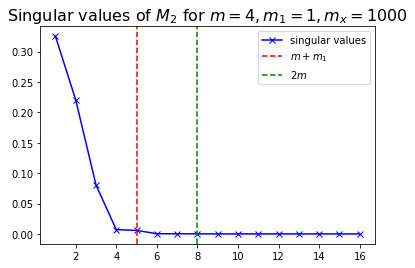

In [4]:
ddf_values, U_dd, D_dd = decomp_svd_dd(X,A,B,randomize=True)
myplots.plot_singular_values(D_dd, m, m_1, m_x, der = 2, filename= g_name + "2nd_4.pdf")
k = m+m_1

print("SVD for unfolding of second derivative:")
ratio_sv_1 = np.sum(D_dd[:k])/np.sum(D_dd)
ratio_sv_2 = np.sum(D_dd[:2*m])/np.sum(D_dd)
print("Ratio singular values: (sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}".format(k, ratio_sv_1))
print("Ratio singular values: (sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}".format(2*m, ratio_sv_2))

print("\nMinimal distance of a_i*a_i to the first m+m_1 left singular vectors:")
for i in range(m):
    print("dist(U[:, :{}], a_{}*a_{}) = {:.6f}".format(k,i,i,np.min(tensor_distance_to_columns(A[:,i], U_dd, k, mode=2))))
print("\nMinimal distance of a_i*a_i to the first 2m left singular vectors:")
for i in range(m):
    print("dist(U[:, :{}], a_{}*a_{}) = {:.6f}".format(2*m,i,i,np.min(tensor_distance_to_columns(A[:,i], U_dd, 2*m, mode=2))))




SVD for unfolding of third derivative:
Ratio singular values:(sv_1+ ...+ sv_5)/(sum_i sv_i)=0.994264
Ratio singular values:(sv_1+ ...+ sv_8)/(sum_i sv_i)=0.999709

Minimal distance of a_i*a_i*a_i to the first m+m_1 left singular vectors:
dist(U[:, :5], a_0*a_0*a_0) = 0.600566
dist(U[:, :5], a_1*a_1*a_1) = 0.960293
dist(U[:, :5], a_2*a_2*a_2) = 0.564243
dist(U[:, :5], a_3*a_3*a_3) = 0.601320

Minimal distance of a_i*a_i*a_i to the first 2m left singular vectors:
dist(U[:, :8], a_0*a_0*a_0) = 0.600566
dist(U[:, :8], a_1*a_1*a_1) = 0.563312
dist(U[:, :8], a_2*a_2*a_2) = 0.564243
dist(U[:, :8], a_3*a_3*a_3) = 0.601320


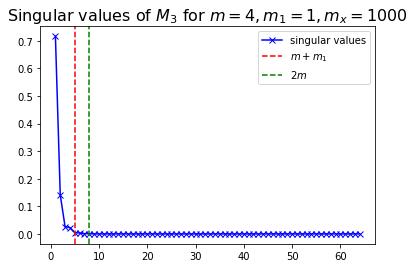

In [5]:
dddf_values, U_ddd, D_ddd = decomp_svd_ddd(X,A,B, randomize=False)
myplots.plot_singular_values(D_ddd, m,m_1,m_x, der = 3, filename=g_name + "3rd_4.pdf")
k = m+m_1

print("\nSVD for unfolding of third derivative:")
ratio_sv_1 = np.sum(D_ddd[:k])/np.sum(D_ddd)
ratio_sv_2 = np.sum(D_ddd[:2*m])/np.sum(D_ddd)

print("Ratio singular values:(sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}".format(k, ratio_sv_1))
print("Ratio singular values:(sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}".format(2*m, ratio_sv_2))
print("\nMinimal distance of a_i*a_i*a_i to the first m+m_1 left singular vectors:")
for i in range(m):
    print("dist(U[:, :{}], a_{}*a_{}*a_{}) = {:.6f}".format(k,i,i,i,np.min(tensor_distance_to_columns(A[:,i], U_ddd, k, mode=3))))
print("\nMinimal distance of a_i*a_i*a_i to the first 2m left singular vectors:")
for i in range(m):
    print("dist(U[:, :{}], a_{}*a_{}*a_{}) = {:.6f}".format(2*m,i,i,i,np.min(tensor_distance_to_columns(A[:,i], U_ddd, 2*m, mode=3))))



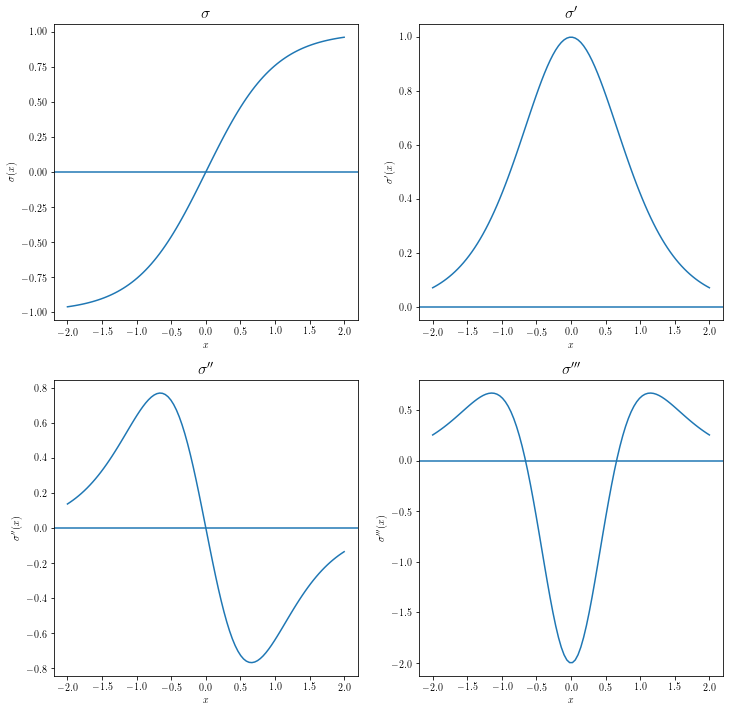

In [6]:
plot_tanh(filename = g_name+".pdf")

In [7]:
m = [2**k for k in range(1,6)]
m_x = [8**k for k in range(1, 5)]
m_1 = 1
ratio_dd = np.zeros((5,4))
ratio_ddd = np.zeros((5,4))
average_dists_dd = np.zeros((5,4))
average_dists_ddd = np.zeros((5,4))

for i in range(5):
    A = ortho_group.rvs(dim = m[i])
    A = np.transpose(A)
    B = ortho_group.rvs(dim = m[i])[:m_1]
    B = np.transpose(B)
    for j in range(i, 4):
        print("\n*****************************************************")
        print("Running for m={},m_1={}, m_x={}:\n".format(m[i],m_1,m_x[j]))
        X = uniformSphere(m[i], m_x[j])
        print("\nSVD for unfolding of second derivative:")
        ddf_values, U_dd, D_dd = decomp_svd_dd(X,A,B,randomize=True)
        k = m[i]+m_1

        ratio_sv_1 = np.sum(D_dd[:k])/np.sum(D_dd)
        ratio_sv_2 = np.sum(D_dd[:2*m[i]])/np.sum(D_dd)
        #ratio_dd[i,j] = ratio_sv
        print("Ratio sv(m+m_1): (sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}\n".format(k, ratio_sv_1))
        print("Ratio sv(2m): (sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}\n".format(2*m[i], ratio_sv_2))
        
        dists_1 = []
        dists_2 = []
        for ind in range(m[i]):
            d_1 = np.min(tensor_distance_to_columns(A[:,ind], U_dd, k, mode=2))
            dists_1.append(d_1)
            d_2 = np.min(tensor_distance_to_columns(A[:,ind], U_dd, m[i]*2, mode=2))
            dists_2.append(d_2)
        avg_1 = np.mean(dists_1)
        min_1 = np.min(dists_1)
        max_1 = np.max(dists_1)
        avg_2 = np.mean(dists_2)
        min_2 = np.min(dists_2)
        max_2 = np.max(dists_2)
        #average_dists_dd[i,j]=avg
        print("Average dist (m+m_1): {:.6f}".format(avg_1))
        print("Minmal dist (m+m_1): {:.6f}".format(min_1))
        print("Maximal dist (m+m_1): {:.6f}".format(max_1))
        print("Average dist (2m): {:.6f}".format(avg_2))
        print("Minimal dist (2m): {:.6f}".format(min_2))
        print("Maximal dist (2m): {:.6f}".format(max_2))        
        #third derivative
        
        print("\nSVD for unfolding of third derivative:")
        dddf_values, U_ddd, D_ddd = decomp_svd_ddd(X,A,B,randomize=True)
        k = m[i]+m_1
        
        ratio_sv_1 = np.sum(D_ddd[:k])/np.sum(D_ddd)
        ratio_sv_2 = np.sum(D_ddd[:2*m[i]])/np.sum(D_ddd)
        #ratio_ddd[i,j] = ratio_sv
        print("Ratio sv(m+m_1): (sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}\n".format(k, ratio_sv_1))
        print("Ratio sv(2m): (sv_1+ ...+ sv_{})/(sum_i sv_i)={:.6f}\n".format(2*m[i], ratio_sv_2))
        
        dists_1 = []
        dists_2 = []
        for ind in range(m[i]):
            d_1 = np.min(tensor_distance_to_columns(A[:,ind], U_ddd, k, mode=3))
            dists_1.append(d_1)
            d_2 = np.min(tensor_distance_to_columns(A[:,ind], U_ddd, m[i]*2, mode=3))
            dists_2.append(d_2)
        avg_1 = np.mean(dists_1)
        min_1 = np.min(dists_1)
        max_1 = np.max(dists_1)
        avg_2 = np.mean(dists_2)
        min_2 = np.min(dists_2)
        max_2 = np.max(dists_2)
        #average_dists_dd[i,j]=avg
        print("Average dist (m+m_1): {:.6f}".format(avg_1))
        print("Minmal dist (m+m_1): {:.6f}".format(min_1))
        print("Maximal dist (m+m_1): {:.6f}".format(max_1))
        print("Average dist (2m): {:.6f}".format(avg_2))
        print("Minimal dist (2m): {:.6f}".format(min_2))
        print("Maximal dist (2m): {:.6f}".format(max_2))    
            

        #avg = np.mean(dists)
        #average_dists_ddd[i,j]=avg



*****************************************************
Running for m=2,m_1=1, m_x=8:


SVD for unfolding of second derivative:
Ratio sv(m+m_1): (sv_1+ ...+ sv_3)/(sum_i sv_i)=1.000000

Ratio sv(2m): (sv_1+ ...+ sv_4)/(sum_i sv_i)=1.000000

Average dist (m+m_1): 0.067457
Minmal dist (m+m_1): 0.061469
Maximal dist (m+m_1): 0.073445
Average dist (2m): 0.067457
Minimal dist (2m): 0.061469
Maximal dist (2m): 0.073445

SVD for unfolding of third derivative:
Ratio sv(m+m_1): (sv_1+ ...+ sv_3)/(sum_i sv_i)=0.989460

Ratio sv(2m): (sv_1+ ...+ sv_4)/(sum_i sv_i)=1.000000

Average dist (m+m_1): 0.122315
Minmal dist (m+m_1): 0.105487
Maximal dist (m+m_1): 0.139142
Average dist (2m): 0.122315
Minimal dist (2m): 0.105487
Maximal dist (2m): 0.139142

*****************************************************
Running for m=2,m_1=1, m_x=64:


SVD for unfolding of second derivative:
Ratio sv(m+m_1): (sv_1+ ...+ sv_3)/(sum_i sv_i)=1.000000

Ratio sv(2m): (sv_1+ ...+ sv_4)/(sum_i sv_i)=1.000000

Average dist (

In [8]:
mvec = list(range(2,13))
m_x = 4000
m_1 = 1
#UGLY!
ratio_dd_1 = []
ratio_dd_2 = []
ratio_ddd_1 = []
ratio_ddd_2 = []
average_dists_dd_1 = []
average_dists_ddd_1 = []
minimal_dists_dd_1 = []
minimal_dists_ddd_1 = []
maximal_dists_dd_1 = []
maximal_dists_ddd_1 = []
average_dists_dd_2 = []
average_dists_ddd_2 = []
minimal_dists_dd_2 = []
minimal_dists_ddd_2 = []
maximal_dists_dd_2 = []
maximal_dists_ddd_2 = []
#end UGLY
for m in mvec:
    A = ortho_group.rvs(dim = m)
    A = np.transpose(A)
    B = ortho_group.rvs(dim = m)[:m_1]
    B = np.transpose(B)
    X = uniformSphere(m, m_x)
    print("Running for m={},m_1={}, m_x={}:\n".format(m,m_1,m_x))
    print("\n*****************************************************")
    print("\nSVD for unfolding of second derivative:")
    ddf_values, U_dd, D_dd = decomp_svd_dd(X,A,B,randomize=True)
    k = m+m_1

    ratio_sv_1 = np.sum(D_dd[:k])/np.sum(D_dd)
    ratio_dd_1.append(ratio_sv_1)
    ratio_sv_2 = np.sum(D_dd[:2*m])/np.sum(D_dd)
    ratio_dd_2.append(ratio_sv_2)
    dists_1 = []
    dists_2 = []
    for ind in range(m):
        d_1 = np.min(tensor_distance_to_columns(A[:,ind], U_dd, k, mode=2))
        dists_1.append(d_1)
        d_2 = np.min(tensor_distance_to_columns(A[:,ind], U_dd, m*2, mode=2))
        dists_2.append(d_2)
    avg_1 = np.mean(dists_1)
    min_1 = np.min(dists_1)
    max_1 = np.max(dists_1)
    avg_2 = np.mean(dists_2)
    min_2 = np.min(dists_2)
    max_2 = np.max(dists_2)
    average_dists_dd_1.append(avg_1)
    average_dists_dd_2.append(avg_2)
    minimal_dists_dd_1.append(min_1)
    minimal_dists_dd_2.append(min_2)
    maximal_dists_dd_1.append(max_1)
    maximal_dists_dd_2.append(max_2)
    #third derivative
        
    print("\nSVD for unfolding of third derivative:")
    dddf_values, U_ddd, D_ddd = decomp_svd_ddd(X,A,B,randomize=True)
    k = m+m_1
        
    ratio_sv_1 = np.sum(D_ddd[:k])/np.sum(D_ddd)
    ratio_ddd_1.append(ratio_sv_1)
    ratio_sv_2 = np.sum(D_ddd[:2*m])/np.sum(D_ddd)
    ratio_ddd_2.append(ratio_sv_2)
    
    dists_1 = []
    dists_2 = []
    for ind in range(m):
        d_1 = np.min(tensor_distance_to_columns(A[:,ind], U_ddd, k, mode=3))
        dists_1.append(d_1)
        d_2 = np.min(tensor_distance_to_columns(A[:,ind], U_ddd, m*2, mode=3))
        dists_2.append(d_2)
    avg_1 = np.mean(dists_1)
    min_1 = np.min(dists_1)
    max_1 = np.max(dists_1)
    avg_2 = np.mean(dists_2)
    min_2 = np.min(dists_2)
    max_2 = np.max(dists_2)
    #average_dists_dd[i,j]=avg
    average_dists_ddd_1.append(avg_1)
    average_dists_ddd_2.append(avg_2)
    minimal_dists_ddd_1.append(min_1)
    minimal_dists_ddd_2.append(min_2)
    maximal_dists_ddd_1.append(max_1)
    maximal_dists_ddd_2.append(max_2)

    #avg = np.mean(dists)
    #average_dists_ddd[i,j]=avg

Running for m=2,m_1=1, m_x=4000:


*****************************************************

SVD for unfolding of second derivative:

SVD for unfolding of third derivative:
Running for m=3,m_1=1, m_x=4000:


*****************************************************

SVD for unfolding of second derivative:

SVD for unfolding of third derivative:
Running for m=4,m_1=1, m_x=4000:


*****************************************************

SVD for unfolding of second derivative:

SVD for unfolding of third derivative:
Running for m=5,m_1=1, m_x=4000:


*****************************************************

SVD for unfolding of second derivative:

SVD for unfolding of third derivative:
Running for m=6,m_1=1, m_x=4000:


*****************************************************

SVD for unfolding of second derivative:

SVD for unfolding of third derivative:
Running for m=7,m_1=1, m_x=4000:


*****************************************************

SVD for unfolding of second derivative:

SVD for unfolding o

In [9]:
ratio_dd_2

[1.0,
 1.0,
 0.99981490796138373,
 0.99990046100299212,
 0.99996694145005971,
 0.99988585606100333,
 0.99982882566323694,
 0.99995839747334192,
 0.99954503034570463,
 0.99973144110224588,
 0.99988481744087809]

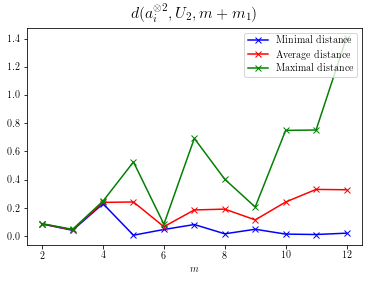

In [10]:
myplots.plot_summary_dist(mvec, minimal_dists_dd_1,r'Minimal distance', average_dists_dd_1,r'Average distance' ,maximal_dists_dd_1, r'Maximal distance', r'$d(a_i^{\otimes 2}, U_2, m+m_1)$', g_name+"_dd_dist_1.pdf")

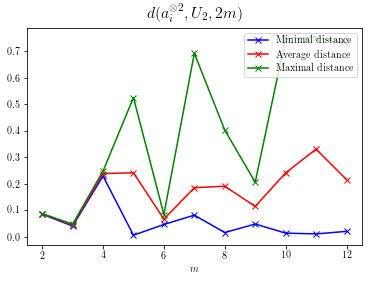

In [11]:
myplots.plot_summary_dist(mvec, minimal_dists_dd_2,r'Minimal distance', average_dists_dd_2,r'Average distance' ,maximal_dists_dd_2, r'Maximal distance', r'$d(a_i^{\otimes 2}, U_2, 2m)$', g_name+"_dd_dist_2.pdf")

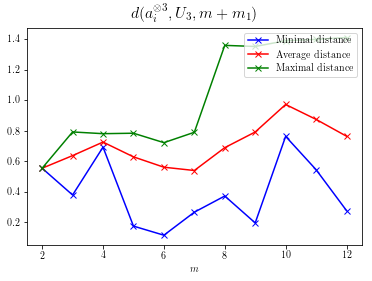

In [12]:
myplots.plot_summary_dist(mvec, minimal_dists_ddd_1,r'Minimal distance', average_dists_ddd_1,r'Average distance' ,maximal_dists_ddd_1, r'Maximal distance', r'$d(a_i^{\otimes 3}, U_3, m+m_1)$', g_name+"_ddd_dist_1.pdf")

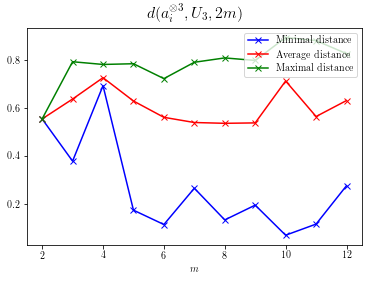

In [13]:
myplots.plot_summary_dist(mvec, minimal_dists_ddd_2,r'Minimal distance', average_dists_ddd_2,r'Average distance' ,maximal_dists_ddd_2, r'Maximal distance', r'$d(a_i^{\otimes 3}, U_3, 2m)$', g_name+"_ddd_dist_2.pdf")

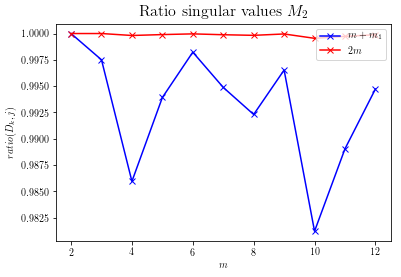

In [14]:
myplots.plot_summary_ratio(mvec, ratio_dd_1,r'$m+m_1$', ratio_dd_2,r'$2m$', r'Ratio singular values $M_2$', g_name+"_dd_ratio.pdf")

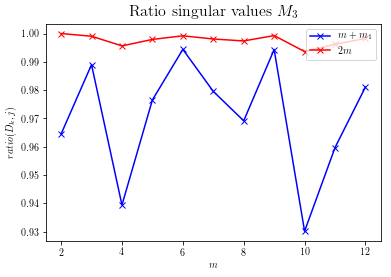

In [15]:
myplots.plot_summary_ratio(mvec, ratio_ddd_1,r'$m+m_1$', ratio_ddd_2,r'$2m$', r'Ratio singular values $M_3$', g_name+"_ddd_ratio.pdf")